In [0]:
import numpy as np
import tensorflow as tf
import os
import time
import matplotlib.pyplot as plt

In [2]:
text = open('./drive/My Drive/AI/out.txt', 'r').read()
print(text[11000:11700])

     heapify(unsorted, 0, i)
    return unsorted


if __name__ == "__main__":
    user_input = input("Enter numbers separated by a comma:\n").strip()
    unsorted = [int(item) for item in user_input.split(",")]
    print(heap_sort(unsorted))


def selection_sort(collection):

    length = len(collection)
    for i in range(length - 1):
        least = i
        for k in range(i + 1, length):
            if collection[k] < collection[least]:
                least = k
        if least != i:
            collection[least], collection[i] = (collection[i], collection[least])
    return collection


if __name__ == "__main__":
    user_input = input("Enter numbers separated by a comma:\n").strip()
 


In [3]:
print (f'Full length of all text data is: {len(text)} characters')
vocabulary = sorted(set(text))
print (f'With {len(vocabulary)} unique characters')

Full length of all text data is: 1007259 characters
With 97 unique characters


# Data preparing


In [0]:
char_to_idx = {c:i for i, c in enumerate(vocabulary)}
idx_to_char = np.array(vocabulary)

text_as_int = np.array([char_to_idx[c] for c in text])

In [5]:
print(vocabulary)

['\t', '\n', ' ', '!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '：']


In [0]:
size = len(text_as_int)
idx_split = int(size*0.75)
train_text_as_int = text_as_int[:idx_split]
test_text_as_int= text_as_int[idx_split:]

In [7]:
print('Examples of symbols and their indexes:')
for char, _ in zip(char_to_idx, range(15)):
    print(f'{repr(char):4s}:\t{char_to_idx[char]:3d},')

Examples of symbols and their indexes:
'\t':	  0,
'\n':	  1,
' ' :	  2,
'!' :	  3,
'"' :	  4,
'$' :	  5,
'%' :	  6,
'&' :	  7,
"'" :	  8,
'(' :	  9,
')' :	 10,
'*' :	 11,
'+' :	 12,
',' :	 13,
'-' :	 14,


# Create training examples and targets


In [0]:
train_char_dataset = tf.data.Dataset.from_tensor_slices(train_text_as_int)
test_char_dataset =  tf.data.Dataset.from_tensor_slices(test_text_as_int)

In [0]:
seq_length = 100
examples_per_epoch = len(text) // (seq_length + 1)

# Mmking sequence
train_sequences = train_char_dataset.batch(seq_length + 1, drop_remainder=True)
test_seqiences = test_char_dataset.batch(seq_length + 1, drop_remainder=True)

In [0]:
EPOCHS=10

vocabulary_size = len(vocabulary)

# Embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [0]:
# Splitting by chunks
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

train_dataset = train_sequences.map(split_input_target)
test_dataset = test_seqiences.map(split_input_target)

In [0]:
BATCH_SIZE = 64

BUFFER_SIZE = 10000

train_dataset = train_dataset.batch(BATCH_SIZE, drop_remainder=True)
test_dataset = test_dataset.batch(BATCH_SIZE, drop_remainder=True)

In [0]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [0]:
# Functions of building models
def simple_rnn(vocabulary_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabulary_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.SimpleRNN(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocabulary_size)
      ])
      return model

def one_layer_lstm(vocabulary_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabulary_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocabulary_size)
      ])
    return model

def two_layer_lstm(vocabulary_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabulary_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocabulary_size)
      ])
    return model

def simple_gru(vocabulary_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabulary_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocabulary_size)
        ])
    return model

In [0]:
model_simple_rnn = simple_rnn(
    vocabulary_size = vocabulary_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)
model_simple_rnn.compile(optimizer='adam', loss=loss,metrics=['accuracy'])

In [0]:
model_one_layer_lstm = one_layer_lstm(
    vocabulary_size = vocabulary_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)
model_one_layer_lstm.compile(optimizer='adam', loss=loss,metrics=['accuracy'])

In [0]:
model_two_layer_lstm = two_layer_lstm(
    vocabulary_size = vocabulary_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)
model_two_layer_lstm.compile(optimizer='adam', loss=loss,metrics=['accuracy'])


In [0]:
model_simple_gru = simple_gru(
  vocabulary_size = vocabulary_size,
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)
model_simple_gru.compile(optimizer='adam', loss=loss,metrics=['accuracy'])

In [0]:
path_save = './drive/My Drive/AI'
# Paths
checkpoint_dir_simple_rnn= f'{path_save}training_checkpoints_simple_rnn'
checkpoint_dir_one_layer_lstm= f'{path_save}training_checkpoints_one_layer_lstm'
checkpoint_dir_two_layer_lstm= f'{path_save}training_checkpoints_two_layer_lstm'
checkpoint_dir_simple_gru = f'{path_save}training_checkpoints_simple_gru'

# Checkpoints
checkpoint_prefix_simple_rnn = os.path.join(checkpoint_dir_simple_rnn, "check_on_{epoch}")

checkpoint_callback_simple_rnn=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix_simple_rnn,
    save_weights_only=True)

checkpoint_prefix_one_layer_lstm = os.path.join(checkpoint_dir_one_layer_lstm, "check_on_{epoch}")

checkpoint_callback_one_layer_lstm=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix_one_layer_lstm,
    save_weights_only=True)


checkpoint_prefix_two_layer_lstm = os.path.join(checkpoint_dir_two_layer_lstm, "check_on_{epoch}")

checkpoint_callback_two_layer_lstm=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix_two_layer_lstm,
    save_weights_only=True)

checkpoint_prefix_simple_gru = os.path.join(checkpoint_dir_simple_gru, "check_on_{epoch}")

checkpoint_callback_simple_gru=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix_simple_gru,
    save_weights_only=True)

# Simple RNN

In [20]:
history_simple_rnn = model_simple_rnn.fit(train_dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_simple_rnn], validation_data=test_dataset)

Epoch 1/10
116/116 [==============================] - 10s 83ms/step - loss: 3.0607 - accuracy: 0.3115 - val_loss: 2.4983 - val_accuracy: 0.3957
Epoch 2/10
116/116 [==============================] - 10s 83ms/step - loss: 2.1747 - accuracy: 0.4550 - val_loss: 2.1769 - val_accuracy: 0.4566
Epoch 3/10
116/116 [==============================] - 9s 81ms/step - loss: 1.9445 - accuracy: 0.5028 - val_loss: 2.0226 - val_accuracy: 0.4897
Epoch 4/10
116/116 [==============================] - 9s 81ms/step - loss: 1.8203 - accuracy: 0.5315 - val_loss: 1.9456 - val_accuracy: 0.5065
Epoch 5/10
116/116 [==============================] - 9s 81ms/step - loss: 1.6779 - accuracy: 0.5649 - val_loss: 1.8648 - val_accuracy: 0.5229
Epoch 6/10
116/116 [==============================] - 9s 81ms/step - loss: 1.5611 - accuracy: 0.5938 - val_loss: 1.8125 - val_accuracy: 0.5384
Epoch 7/10
116/116 [==============================] - 9s 81ms/step - loss: 1.4629 - accuracy: 0.6170 - val_loss: 1.7699 - val_accuracy: 0.55

# One Layer LSTM

In [21]:
history_one_layer_lstm = model_one_layer_lstm.fit(train_dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_one_layer_lstm], validation_data=test_dataset)

Epoch 1/10
116/116 [==============================] - 8s 72ms/step - loss: 2.8483 - accuracy: 0.3283 - val_loss: 2.5143 - val_accuracy: 0.3695
Epoch 2/10
116/116 [==============================] - 8s 68ms/step - loss: 2.2537 - accuracy: 0.4307 - val_loss: 2.1067 - val_accuracy: 0.4547
Epoch 3/10
116/116 [==============================] - 8s 68ms/step - loss: 1.9199 - accuracy: 0.5024 - val_loss: 1.8780 - val_accuracy: 0.5112
Epoch 4/10
116/116 [==============================] - 8s 67ms/step - loss: 1.6866 - accuracy: 0.5578 - val_loss: 1.7310 - val_accuracy: 0.5471
Epoch 5/10
116/116 [==============================] - 8s 68ms/step - loss: 1.4971 - accuracy: 0.6049 - val_loss: 1.6243 - val_accuracy: 0.5758
Epoch 6/10
116/116 [==============================] - 8s 67ms/step - loss: 1.3440 - accuracy: 0.6440 - val_loss: 1.5653 - val_accuracy: 0.5933
Epoch 7/10
116/116 [==============================] - 8s 67ms/step - loss: 1.2206 - accuracy: 0.6752 - val_loss: 1.5368 - val_accuracy: 0.6013

#Two Layer LSTM

In [22]:
history_two_layer_lstm = model_two_layer_lstm.fit(train_dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_two_layer_lstm], validation_data=test_dataset)

Epoch 1/10
116/116 [==============================] - 17s 145ms/step - loss: 2.9613 - accuracy: 0.3000 - val_loss: 2.7157 - val_accuracy: 0.3153
Epoch 2/10
116/116 [==============================] - 16s 138ms/step - loss: 2.4062 - accuracy: 0.3836 - val_loss: 2.3197 - val_accuracy: 0.3996
Epoch 3/10
116/116 [==============================] - 16s 138ms/step - loss: 2.0252 - accuracy: 0.4743 - val_loss: 1.9665 - val_accuracy: 0.4853
Epoch 4/10
116/116 [==============================] - 16s 138ms/step - loss: 1.7550 - accuracy: 0.5361 - val_loss: 1.7798 - val_accuracy: 0.5285
Epoch 5/10
116/116 [==============================] - 16s 138ms/step - loss: 1.5316 - accuracy: 0.5913 - val_loss: 1.6629 - val_accuracy: 0.5609
Epoch 6/10
116/116 [==============================] - 16s 138ms/step - loss: 1.3386 - accuracy: 0.6416 - val_loss: 1.6119 - val_accuracy: 0.5804
Epoch 7/10
116/116 [==============================] - 16s 139ms/step - loss: 1.1867 - accuracy: 0.6815 - val_loss: 1.5635 - val_ac

# Simple GRU

In [23]:
history_simple_gru = model_simple_gru.fit(train_dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_simple_gru], validation_data=test_dataset)

Epoch 1/10
116/116 [==============================] - 6s 55ms/step - loss: 2.9979 - accuracy: 0.3431 - val_loss: 2.3969 - val_accuracy: 0.3893
Epoch 2/10
116/116 [==============================] - 6s 51ms/step - loss: 2.1791 - accuracy: 0.4433 - val_loss: 2.0392 - val_accuracy: 0.4701
Epoch 3/10
116/116 [==============================] - 6s 53ms/step - loss: 1.8557 - accuracy: 0.5177 - val_loss: 1.8171 - val_accuracy: 0.5261
Epoch 4/10
116/116 [==============================] - 6s 52ms/step - loss: 1.6194 - accuracy: 0.5754 - val_loss: 1.6838 - val_accuracy: 0.5656
Epoch 5/10
116/116 [==============================] - 6s 52ms/step - loss: 1.4333 - accuracy: 0.6220 - val_loss: 1.6038 - val_accuracy: 0.5877
Epoch 6/10
116/116 [==============================] - 6s 52ms/step - loss: 1.2807 - accuracy: 0.6609 - val_loss: 1.5589 - val_accuracy: 0.6003
Epoch 7/10
116/116 [==============================] - 6s 52ms/step - loss: 1.1502 - accuracy: 0.6940 - val_loss: 1.5458 - val_accuracy: 0.6068

In [0]:
model_simple_rnn = simple_rnn(vocabulary_size, embedding_dim, rnn_units, batch_size=1)

model_simple_rnn.load_weights(tf.train.latest_checkpoint(checkpoint_dir_simple_rnn))

model_simple_rnn.build(tf.TensorShape([1, None]))

In [0]:
model_one_layer_lstm = one_layer_lstm(vocabulary_size, embedding_dim, rnn_units, batch_size=1)

model_one_layer_lstm.load_weights(tf.train.latest_checkpoint(checkpoint_dir_one_layer_lstm))

model_one_layer_lstm.build(tf.TensorShape([1, None]))

In [0]:
model_two_layer_lstm = two_layer_lstm(vocabulary_size, embedding_dim, rnn_units, batch_size=1)

model_two_layer_lstm.load_weights(tf.train.latest_checkpoint(checkpoint_dir_two_layer_lstm))

model_two_layer_lstm.build(tf.TensorShape([1, None]))

In [0]:
model_simple_gru = simple_gru(vocabulary_size, embedding_dim, rnn_units, batch_size=1)

model_simple_gru.load_weights(tf.train.latest_checkpoint(checkpoint_dir_simple_gru))

model_simple_gru.build(tf.TensorShape([1, None]))

# Text generating

In [0]:
def generate_text(model, start_string):
    # Evaluation step (generating text using the learned model)
    # Number of characters to generate
    num_generate = 1000
  
    # Vectorizing
    evaluation = [char_to_idx[s] for s in start_string]
    evaluation = tf.expand_dims(evaluation, 0)
    # Empty string to store our results
    new_text = []

    # Low temperatures results in more predictable text
    # Higher temperatures results in more surprising text
    # Experiment to find the best setting
    temperature = 1.0

    # Batch size = 1
    model.reset_states()

    for i in range(num_generate):
        predictions = model(evaluation)

        # Removing the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state
        evaluation = tf.expand_dims([predicted_id], 0)

        new_text.append(idx_to_char[predicted_id])
    return (start_string + ''.join(new_text))

# Generated code of all models

In [29]:
print(generate_text(model_simple_rnn, start_string="if __name__ == \'__main__\':\n"))

if __name__ == '__main__':
    )
        semp1 == left.hounssasslist.soutink

    def ren(ratd)).arrom(Watin

        return _retin([5]) * len(chor2,  = coor[reut.cigher_mparent.right

    eif self.in_resoltBstargex) -> Nob : intr self.preyL[selt.list_ple[:/"*-4].Zencitit(")
    mit] = "doft_atein_titicosh(key)):
 bromess.solite(*")
    key_mils = [self.laclloss()
    print("A>= ".j

is 12, times = []
    tree.fist(ins)
    print(f"E+=1)
    else:
            self.siors = lemalingerssoat[i] == 1
        if                      crect(selt) -> TreeNonsvapul

    def __mFiti_noin_pate()

    print(f"Brectset(keyFulof):

    def vallesims(s)

                outs_rotat_lower().romgt), pates) -> iat: left += 1
            self.freakneales(cect_nex__root(_nade.sotol_best== statt) -> str:
    ret = Neness:
        return semINFil = Train_Dise(grapl[bedata[key== paren.s(min()
        return (self.ja:
        return Fal el ass g.coVerrited"\n"M"vicPoat:1"))
        for ch in self.sibl=="P"MBOLS

In [30]:
print(generate_text(model_one_layer_lstm, start_string="if __name__ == \'__main__\':\n"))

if __name__ == '__main__':
    @paored_firencutimap(self.encrypt_onchy:
                return -1

    def __nimi__(":     _   mud_poolictertion.lingtance(len(str=Nown)
        self.wit_not = let()
                next_ncol = ch
            for keywirt timoint:
        while prue_arr[i]
    symple = []

    return Mixth


def create_chts = [hyst.pleff(twal.app
           x_new

     @dex_size_paiting_time2, train_tablet(x)
        srcVertex = tree.right.right(sllf.min_beatenctive",
                self.keyBion(train_x,
    tree_insert(17834764_864__531_365_443_688_Falue, whild_porition_time(DTataR, x)

    pmint(decrypt(chl_cluster
 suscontertor=abtubackIn; 	actoda.clo/`/
			ficfils?"
            self.label(keyArime_check([3], keySize)
)


if __name__ == "__main__"


def devalk_exilist()
    plt._minflo_rabin(Q_newt_ind:
    clost_insert(input_string(self.right_not init, stm:
        return Files(
        self.parent.flow()

            while  / decipition or j in adget[vaid_]att
	
	un

In [31]:
print(generate_text(model_two_layer_lstm, start_string="if __name__ == \'__main__\':\n"))

if __name__ == '__main__':
    bf),
    "E": "...---",
    "K": ".....-S.B6-1(OQ"),
    [0.7, 1.7757],
        957,
        [1, 3, 2, 0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 1
    [0, 0, 0, 0, 0],
)


class Bobe6)
graph
    def shocks(statulher":
        biser_corrate_forca_herver_cost = False
    right_list[i, "deterationS[F1.")),
            }("Enterbodic"MaB}")
                    if self.left..gireL.jeyS():
                keyA TheE B Fibona root"
                f"data huy to divate Ha^turn")
    if self.right(v.Z) ond oote!we/" "$ ortion"'")
    unary = ""
    print(input("\ncour)")
stort thpated time that!")
		chy out>>"	inc."
	extithed
 	=$b
						/\		;$		$	^			$^od/`"{.G	|		*	}	d]|/	>\		"			$			^	${	//	^;	cz^^?$}\						\				j$	c<\;z" 	%>	?cw|\.\n\$F|		&	^<{"";			
						%		!\/$$$	$^{$\V	G	$$|	\Gufev/"d"$			^		;		tJn"		$/;/;/	**	$"$	f--^\$Z$	$$	^T/|$	!\$i$i.fp-"$$$$^d	$G*{'^>X			|		&|'\^;&\Id："	^	}	;	;-	/{^$}f"	$W$z'r/^$$L}&W^""					$		^：*	;			?"		;			"|	'h3			w	?	\	*	~\	
	

In [32]:
print(generate_text(model_simple_gru, start_string="if __name__ == \'__main__\':\n"))

if __name__ == '__main__':
            rascle= Trueitions({mid) + forwed(* ")
            check = item += pattern%tEdg_positions()

        if self.is is None:
              rri in prevertex.append([0):
        return False


def newton_ruphours(prain:

        if len(stockec)
         n = math[i - 1][j - no][k] + c = "ZBUABQ",
        "K"G":, "etPi: ",.""."0..-99.658_885_8675, 1.769],
    [5.489, -.689, 8.8],
   [["C"],
    "C14: 1.04",
        "%s = "A[B.SIJu.divet:"")
    print("\nWipher map           "hup inversection for i e       return False
                if self.tax [left + closest_in_state[source:
                palse = charaction[j]
            or (heapection) %s(a[row:)[0] + 10")
                )

    return 100
    return chars,
         719,
        217,
        372,
        447,
        989,
        477,
        199,
        799,
        "833],
    "H": "......gattub, character2Nbe(a, l), vessutations
    while True of parent.color(self.list) + 1):
                   

In [33]:
print(generate_text(model_simple_gru, start_string="if __name__ == \'__main__\':\n"))

if __name__ == '__main__':
    pattern = ""
    tople.titt("th is {mean(0, ").shopte):
        raise Typet", "uncof": Meass_shate deve_ilj}")
        if not (0 <= 2 and rypartent()])
            if self.len(revile))

    for i in alpha:
        return T, encrypted.Tx
                key = (len(string.time, List[int])
        if color[ind is None:
                                        edges set():
        return False


def in_tring_time_sort(bunsike, max_rev, = 10:
            if self.i > self._key_list.pop()
                    with open("Ar-", "b", "E+", "Y.CDj is +6.forces(" and not user_list[0])
        i += 1

    return deque

    return "\n char {: ").strip()
    total_turl = boloracy(sum) % mid


if __name__ == "__main__":
    import doctest

    doctest.testmod()
tree.append(temp
        ret.iterror("Uosh("W")}")
fij = (left + rot foul."aked', data*s2):
                repur_left

    for i in zetT[0][-1:-0.191], "N.-"-")
    if contingut <= b > calculate_encrypt_vector[1]
 

In [0]:
path = './drive/My Drive/AI/Plots/'
def plot_metrics(history, key_list, title_fig = '', name_save='fig'):
    count_key = len(key_list)
    fig, axs = plt.subplots(nrows=1,ncols =count_key, figsize=(12,6))
    plt.subplots_adjust(wspace=0.25, hspace=0)
    fig.suptitle(title_fig, fontsize=16)
    if count_key > 1:
        for i,key in enumerate(key_list):
            axs[i].plot(history.history[key],label=f'train {key}',color='green')
            axs[i].plot(history.history[f'val_{key}'],label=f'test {key}',color='red')
            axs[i].set_title(f'metrics -- {key}')
      
          axs[i].set_ylabel(f'{key}')
          axs[i].legend()
    else:
        key = key_list[0]
        axs.plot(history.history[key],label=f'train {key}',color='green')
        axs.plot(history.history[f'val_{key}'],label=f'test {key}',color='red')
      
        axs.set_title(f'metrics -- {key}')
        axs.set_ylabel(f'{key}')
        axs.legend()
  
    fig.savefig(f'{path}metrics_{name_save}.png')

In [0]:
metrics = ['loss', 'accuracy']

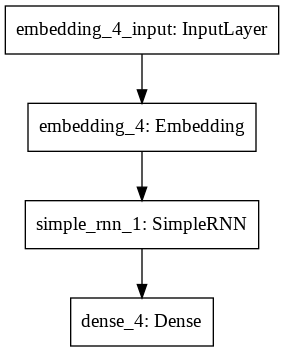

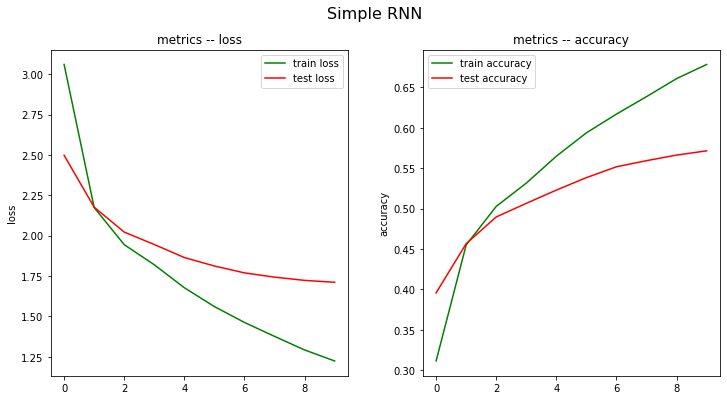

In [36]:
plot_metrics(history_simple_rnn, metrics, title_fig = 'Simple RNN', name_save='simple_rnn' )
tf.keras.utils.plot_model(model_simple_rnn, to_file=f'{path}model_simle_rnn.png')

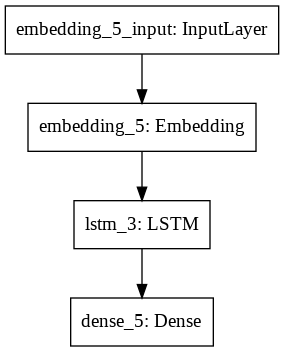

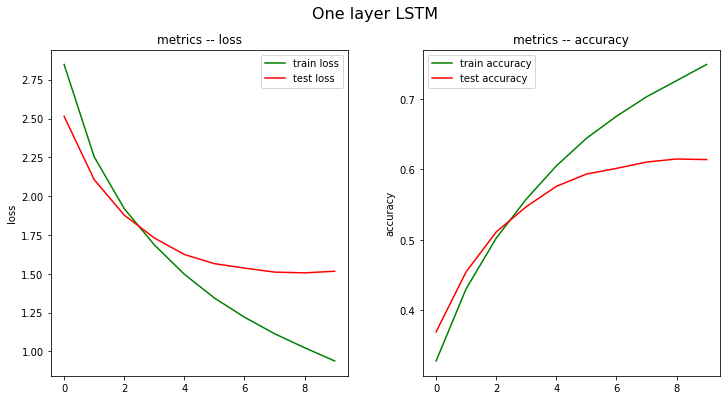

In [37]:
plot_metrics(history_one_layer_lstm, metrics, title_fig = 'One layer LSTM', name_save='one_layer_lstm' )
tf.keras.utils.plot_model(model_one_layer_lstm, to_file=f'{path}model_one_layer_lstm.png')

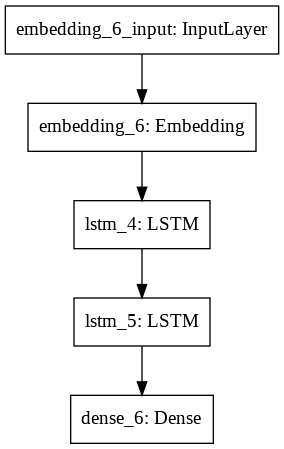

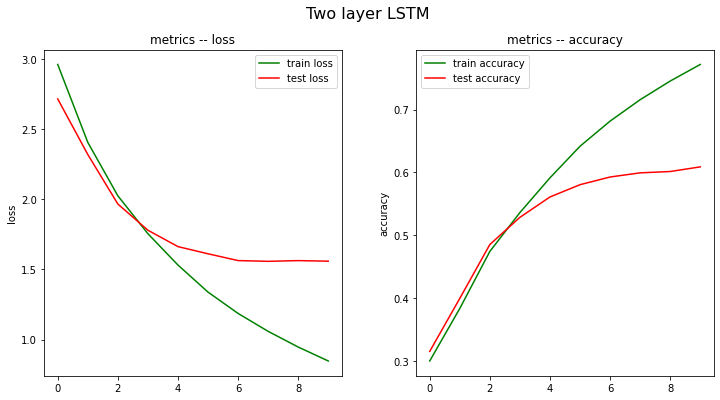

In [38]:
plot_metrics(history_two_layer_lstm, metrics, title_fig = 'Two layer LSTM', name_save='two_layer_lstm' )
tf.keras.utils.plot_model(model_two_layer_lstm, to_file=f'{path}model_two_layer_lstm.png')

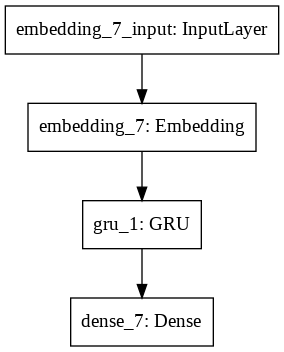

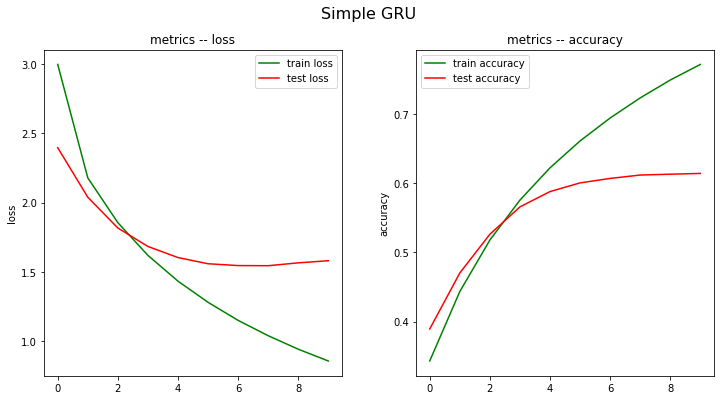

In [39]:
plot_metrics(history_simple_gru, metrics, title_fig = 'Simple GRU', name_save='simple_gru' )
tf.keras.utils.plot_model(model_simple_gru, to_file=f'{path}model_simple_gru.png')